# Multivariable Logistic Regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

## Multivariable Logistic Function

The **multivariable logistic function** is

$$
\sigma(\mathbf{x}; \mathbf{W}, b) = \frac{1}{1 + e^{- \left( \langle \mathbf{W} , \mathbf{x} \rangle + b \right)}}
$$

where $\mathbf{x} \in \mathbb{R}^n$ and $\mathbf{W} \in \mathbb{R}^n$ is the **weight vector** and $b \in \mathbb{R}$ is the **bias parameter**. The term $\langle \mathbf{W} , \mathbf{x} \rangle$ is the inner product

$$
\langle \mathbf{W} , \mathbf{x} \rangle = W_0 x_0 + \cdots + W_{n-1} x_{n-1}
$$

where

$$
\mathbf{W} = \begin{bmatrix} W_0 \\ \vdots \\ W_{n-1} \end{bmatrix}
\hspace{10mm}
\mathbf{x} = \begin{bmatrix} x_0 \\ \vdots \\ x_{n-1} \end{bmatrix}
$$

## Halfspaces and Decision Boundary

Fix a weight vector $\mathbf{W} \in \mathbb{R}^n$ and bias parameter $b \in \mathbb{R}$. The equation $\langle \mathbf{W} , \mathbf{x} \rangle + b = 0$ defines a hyperplane

$$
H_0 = \{ \mathbf{x} \in \mathbb{R}^n : \langle \mathbf{W} , \mathbf{x} \rangle + b = 0 \} \subset \mathbb{R}^n
$$

The space $\mathbb{R}^n$ is divided into the halfspaces

$$
H_+ = \{ \mathbf{x} \in \mathbb{R}^n : \langle \mathbf{W} , \mathbf{x} \rangle + b > 0 \}
$$

and

$$
H_- = \{ \mathbf{x} \in \mathbb{R}^n : \langle \mathbf{W} , \mathbf{x} \rangle + b < 0 \}
$$

Note that $\sigma(\mathbf{x}; \mathbf{W},b) > 1/2$ for all $\mathbf{x} \in H_+$ and $\sigma(\mathbf{x}; \mathbf{W},b) < 1/2$ for all $\mathbf{x} \in H_-$ therefore if we use the function $\sigma(\mathbf{x}; \mathbf{W},b)$ as a logistic regression model for classification then the model predicts $y=1$ for all $\mathbf{x} \in H_+$ and $y=0$ for all $\mathbf{x} \in H_-$. The halfspaces are separated by $H_0$ and so we call $H_0$ the **decision boundary**.

For example, let's plot the logistic function for $n=2$ with $\mathbf{W} = (1,-2)^T$ and $b = 1$ and include the decision boundary.

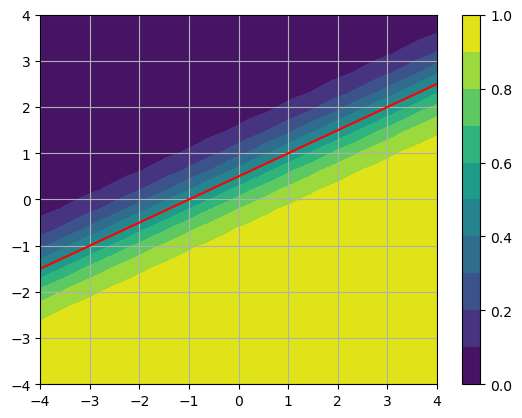

In [2]:
x0 = np.linspace(-4,4,20)
x1 = np.linspace(-4,4,20)
X0,X1 = np.meshgrid(x0,x1)
W0 = 1; W1 = -2; b = 1;
Y = 1/(1 + np.exp(-(W0*X0 + W1*X1 + b)))
plt.contourf(X0,X1,Y,levels=np.arange(0,1.1,0.1)), plt.colorbar()
plt.contour(X0,X1,Y,levels=[0.5],colors='r')
plt.grid(True)
plt.show()

## Cross Entropy

Let $(\mathbf{x}_0,y_0),\dots,(\mathbf{x}_{N-1},y_{N-1})$ be a set of observations such that $\mathbf{x}_k \in \mathbf{R}^n$ and $y_k = 0$ or $1$ for all $k=0,\dots,N-1$. The **cross entropy** cost function with L2 regularization is given by

$$
C(\mathbf{W},b,\alpha) = -\frac{1}{N} \sum_{k=0}^{N-1} \left( y_k \log( \sigma(\mathbf{x}_k; \mathbf{W},b) ) + (1 - y_k)\log(1 - \sigma(\mathbf{x}_k; \mathbf{W},b)) \right) + \alpha \Vert \mathbf{W} \Vert^2
$$

We construct a logistic regression model for the data by computing optimal parameters $\mathbf{W}$ and $b$ which minimize $C(\mathbf{W},b,\alpha)$ for a suitable choice of the regularization parameters $\alpha$.

## Computing Optimal Parameters with `sklearn`

The function `sklearn.linear_model.LogisticRegression` computes optimal parameters $\mathbf{W}$ and $b$ using the cross entropy cost function. The function implements L2 regularization by default with regularization parameter $C = 1$. Note that the parameter $C$ corresponds to $1/\alpha$ in our formulation.

Consider the example data:

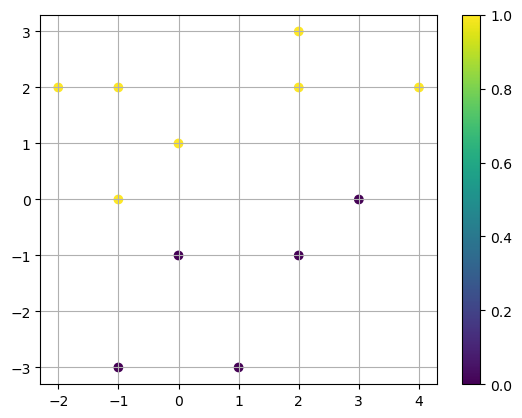

In [4]:
X = np.array([[2,3],[-1,2],[0,1],[1,-3],[4,2],[-1,-3],[3,0],[2,2],[2,-1],[-2,2],[-1,0],[0,-1]])
y = [1,1,1,0,1,0,0,1,0,1,1,0]
plt.scatter(X[:,0],X[:,1],c=y), plt.colorbar()
plt.grid(True)
plt.show()

We can estimate the parameters $\mathbf{W} = (-2,4)^T$ and $b=1$ simply by inspection. 

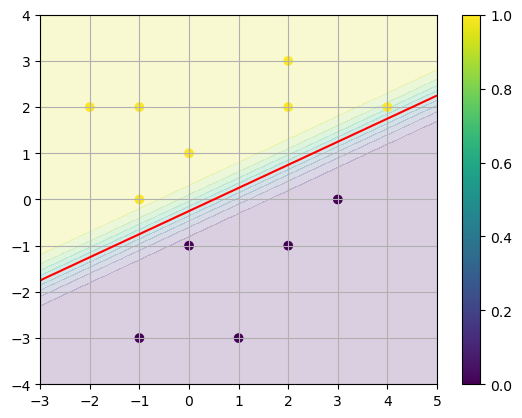

In [7]:
x0 = np.linspace(-3,5,50); x1 = np.linspace(-4,4,50);
X0,X1 = np.meshgrid(x0,x1)

W0 = -2; W1 = 4; b = 1
Y = 1/(1 + np.exp(-(W0*X0 + W1*X1 + b)))
plt.contourf(X0,X1,Y,levels=10,alpha=0.2)
plt.contour(X0,X1,Y,levels=[0.5],colors='r')

plt.scatter(X[:,0],X[:,1],c=y)
plt.grid(True), plt.colorbar()
plt.show()

Now let's use `LogisticRegression` to fit the model. First, let's do the computation with $C=1$.

In [9]:
model = LogisticRegression(C=1).fit(X,y)

The result is an object which we assign to the variable `model`.

In [10]:
type(model)

sklearn.linear_model._logistic.LogisticRegression

The object stores the model parameters as attributes. Access the weight vector $\mathbf{W}$ by the attribute `.coeff_`.

In [11]:
model.coef_

array([[-0.46001636,  1.40410441]])

Access the bias parameter $b$ by the attribute `.intercept_`.

In [12]:
model.intercept_

array([0.46965697])

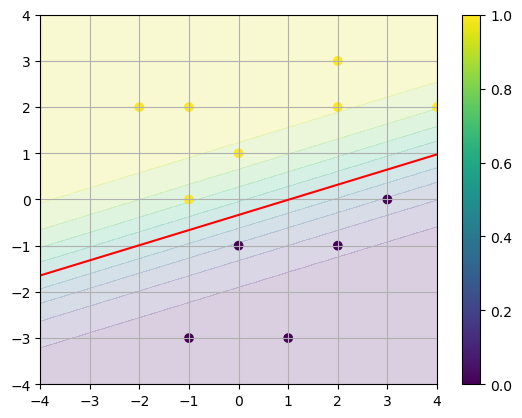

In [13]:
x0 = np.linspace(-4,4,50); x1 = np.linspace(-4,4,50);
X0,X1 = np.meshgrid(x0,x1)

W0 = model.coef_[0,0]; W1 = model.coef_[0,1]; b = model.intercept_[0]
Y = 1/(1 + np.exp(-(W0*X0 + W1*X1 + b)))
plt.contourf(X0,X1,Y,levels=10,alpha=0.2)
plt.contour(X0,X1,Y,levels=[0.5],colors='r')

plt.scatter(X[:,0],X[:,1],c=y)
plt.grid(True), plt.colorbar()
plt.show()

Note that the classes $y=0$ and $y=1$ are clearly separated and so we can reduce the regularization parameter $\alpha$ (increase $C$) to allow larger values $\Vert \mathbf{W} \Vert$ which corresponds to a steeper step function from $y=0$ to $y=1$.

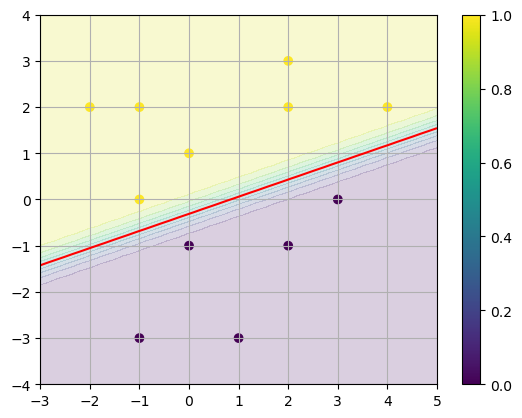

In [16]:
x0 = np.linspace(-3,5,50); x1 = np.linspace(-4,4,50);
X0,X1 = np.meshgrid(x0,x1)

model = LogisticRegression(C=100).fit(X,y)
W0 = model.coef_[0,0]; W1 = model.coef_[0,1]; b = model.intercept_[0]
Y = 1/(1 + np.exp(-(W0*X0 + W1*X1 + b)))
plt.contourf(X0,X1,Y,levels=10,alpha=0.2)
plt.contour(X0,X1,Y,levels=[0.5],colors='r')

plt.scatter(X[:,0],X[:,1],c=y)
plt.grid(True), plt.colorbar()
plt.show()

:::{seealso}
Check out the [sklearn documentation](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression) to learn more about the `LogisticRegression` model.
:::

## Example: Iris Data

The module `sklearn.datasets` includes example datasets and the function `load_iris` loads an object which contains a data matrix with 150 samples and 4 features, and a target vector with 150 values. We save the data matix as `X` and the target vector as `y` in the cells below.

In [11]:
iris = load_iris()
X = iris.data
y = iris.target

In [12]:
X.shape

(150, 4)

In [13]:
y.shape

(150,)

The data consists of length measurements of different species of iris flowers:

In [14]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [15]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

There are 3 targets values in the dataset and so let's combine the species *versicolor* and *virginica* into the same category so that our target values are $y=0$ if the species is *setosa* and $y=1$ if the species is *versicolor* or *virginica*. Modify the vector `y` so that the target value `2` is now `1`.

In [16]:
y[y == 2] = 1

Let's build a logistic regression model for the features *sepal length* and *sepal width*. Plot the data:

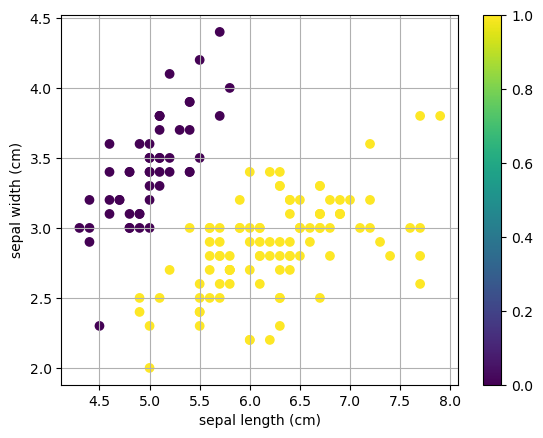

In [17]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.grid(True), plt.colorbar()
plt.show()

Use `sklearn.linear_model.LogisticRegression` to compute the logistic function. Note that `LogisticRegression` automatically applies L2 regularization with cross entropy cost function. The plot above shows that there is a clear separation between the two classes therefore reducing regularization will increase the weights to create a very sharp step function between the halfspaces. Adjust the parameter `C` in `LogistRegression` and observe the change in the logistic regression model.

In [18]:
model = LogisticRegression(C=1).fit(X[:,[0,1]],y)

In [19]:
W = model.coef_[0,:]
print('W =',W)

W = [ 3.38829757 -3.1645277 ]


In [20]:
b = model.intercept_[0]
print('b =',b)

b = -8.323303886430963


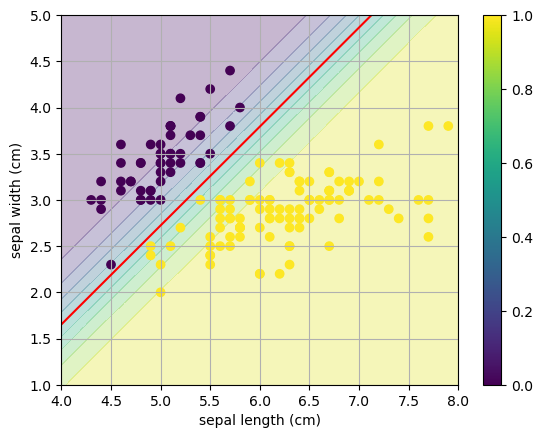

In [21]:
x0 = np.linspace(4,8,20); x1 = np.linspace(1,5,20);
X0,X1 = np.meshgrid(x0,x1)
Y = 1/(1 + np.exp(-(W[0]*X0 + W[1]*X1 + b)))
plt.contourf(X0,X1,Y,levels=10,alpha=0.2)
plt.contour(X0,X1,Y,levels=[0.5],colors='r')

plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.grid(True), plt.colorbar()
plt.show()

Let's run the code again but increase the regularization parameter `C` (which corresponds to $1/\alpha$ in our formulation).

In [22]:
model = LogisticRegression(C=100).fit(X[:,[0,1]],y)

In [23]:
W = model.coef_[0,:]
print('W =',W)

W = [ 11.95196336 -11.30095916]


In [24]:
b = model.intercept_[0]
print('b =',b)

b = -28.889002840276113


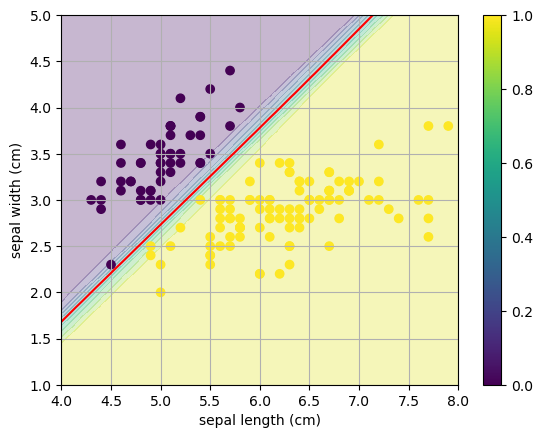

In [25]:
x0 = np.linspace(4,8,20); x1 = np.linspace(1,5,20);
X0,X1 = np.meshgrid(x0,x1)
Y = 1/(1 + np.exp(-(W[0]*X0 + W[1]*X1 + b)))
plt.contourf(X0,X1,Y,levels=10,alpha=0.2)
plt.contour(X0,X1,Y,levels=[0.5],colors='r')

plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.grid(True), plt.colorbar()
plt.show()

The weight vector defines the same decision boundary however the logistic function is a much sharper step function between the halfspaces.